In [1]:
import matplotlib.pyplot as plt

import numpy as np

from astropy.io import fits
from astropy.table import Table

import sncosmo

In [2]:
my_map = {'u ':'u', 'g ':'g', 'r ':'r', 'i ':'i', 'z ':'z', 'Y ':'y'}

In [3]:
colors_6_dict = {'u':'violet', 'g':'green', 'r':'red', 'i':'indigo', 'z':'darkslategray', 'y':'yellow'}
colors_6_list = ['u', 'g', 'r', 'i', 'z', 'y']
def return_flux_w_err(df):
    '''
    for a particular category this function returns:
    mjds as x, flux as y, flux_err as y_err 
    '''
    x_all_bands = {}
    y_all_bands = {}
    y_err_all_bands = {}
    for band in range(len(colors_6_list)):
        sample = df[df['passband']==colors_6_list[band]]

        phase=sample['MJD']
        x_all_bands[colors_6_list[band]] = phase
        y_all_bands[colors_6_list[band]] = sample['FLUXCAL']
        y_err_all_bands[colors_6_list[band]] = sample['FLUXCALERR']
    return x_all_bands, y_all_bands, y_err_all_bands

In [4]:
def plot_4_bands_w_GP(dates, fl, fl_err):
    '''
    dates, fl, fl_err are all dictionaries 
    keys: 6 bands based on the colors_6_list = ['violet', 'green', 'red', 'indigo', 'darkslategray', 'yellow']
    values: dates: mjds, fl: photon flux, fl_err: corresponding error
    id: integer; object id
    change the selected color list below to see other bands
    '''

    color_list_selected = ['r', 'g', 'i', 'y']
    plot_colors = ['crimson', 'seagreen', 'indigo', 'gold']
    alpha_list = [0.2, 0.2, 0.3, 0.5]
    markers = ['s', 'o', '*', 'd']
    fig, axs = plt.subplots(4, 1, figsize=(10, 7))
    for x, y, z, c, mr in zip(axs, color_list_selected, alpha_list, plot_colors, markers):
        x.errorbar(dates[y], fl[y], fl_err[y], fmt=mr, 
                   color=c, label='Org.', alpha=0.7)
    axs[0].legend(fontsize=11)
    axs[3].set_xlabel('MJD', fontsize=12)
    fig.text(0.01, 0.5, 'Flux', va='center', rotation='vertical', fontsize=14)
    plt.tight_layout()    
    #plt.suptitle('ObjID_%d_RGIY'%(id), fontsize=11)
    plt.tight_layout()
    plt.show()

In [5]:
def plot_6_bands_w_GP(dates, fl, fl_err):
    '''
    dates, fl, fl_err are all dictionaries 
    keys: 6 bands based on the colors_6_list = ['violet', 'green', 'red', 'indigo', 'darkslategray', 'yellow']
    values: dates: mjds, fl: photon flux, fl_err: corresponding error
    id: integer; object id
    change the selected color list below to see other bands
    '''

    color_list_selected = ['r', 'g', 'i', 'y', 'u', 'z']
    plot_colors = ['crimson', 'seagreen', 'indigo', 'gold', 'violet', 'lavender' ]
    alpha_list = [0.2, 0.2, 0.3, 0.5, 0.4, 0.4]
    markers = ['s', 'o', '*', 'd', 'p', '+']
    fig, axs = plt.subplots(figsize=(10, 6))
    for y, z, c, mr in zip(color_list_selected, alpha_list, plot_colors, markers):
        plt.errorbar(dates[y], fl[y], fl_err[y], fmt=mr, 
                     color=c, label=y, alpha=0.7)
    axs.legend(fontsize=11)
    axs.set_xlabel('MJD', fontsize=12)
    fig.text(0.01, 0.5, 'Flux', va='center', rotation='vertical', fontsize=14)
    plt.tight_layout()    
    #plt.suptitle('ObjID_%d_RGIY'%(id), fontsize=11)
    plt.tight_layout()
    plt.show()

### Try Reading with SNCOSMO

In [6]:
elasticc_fits_check = sncosmo.read_snana_fits(phot_file = './ELASTICC2_TRAIN_02_NONIaMODEL0-0023_K17_PHOT.FITS', 
                                              head_file = './ELASTICC2_TRAIN_02_NONIaMODEL0-0023_K17_HEAD.FITS')
#print (elasticc_fits_KN.info())
print ('check total length of the list: ', len(elasticc_fits_check))
print ('\n')
print (elasticc_fits_check[0][0:5])
print ('\n')
print (elasticc_fits_check[0].meta)
print ('check type: ', type(elasticc_fits_check[0]))
print (elasticc_fits_check[0].meta['HOSTGAL_SNSEP'])


check total length of the list:  124


   MJD     BAND CCDNUM    FIELD     ... YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ------------------- ----------
61059.3506   i      -9 VOID         ... -9.0                 0.0       99.0
 61059.362   r      -9 VOID         ... -9.0                 0.0       99.0
61060.3638   i      -9 VOID         ... -9.0                 0.0       99.0
61062.3638   r      -9 VOID         ... -9.0                 0.0       99.0
61067.2812   Y      -9 VOID         ... -9.0                 0.0       99.0


OrderedDict([('SNID', b'30648924'), ('IAUC', b'NULL            '), ('FAKE', 2), ('RA', 197.47934056063156), ('DEC', -14.013408769101053), ('PIXSIZE', 0.2), ('NXPIX', -9), ('NYPIX', -9), ('SNTYPE', 150), ('NOBS', 196), ('PTROBS_MIN', 1), ('PTROBS_MAX', 196), ('MWEBV', 0.05065466), ('MWEBV_ERR', 0.0025327331), ('REDSHIFT_HELIO', 0.14426771), ('REDSHIFT_HELIO_ERR', 0.16264), ('REDSHIFT_FINAL', 0.14549324), ('REDSHIFT_FINAL_ERR

In [9]:
def read_fits(phot_file, head_file, low_bound_days, high_bound_days, obj_id):
    '''
    phot_file = photon file containing the time series, days and flux
    head_file = header file containing metadata. 
    low_bound days: from the peak flux day, how many days before
    high_bound_days: 
    '''
    elasticc_fits = sncosmo.read_snana_fits(phot_file=phot_file, head_file=head_file)
    days_col = elasticc_fits[obj_id]['MJD']
    peak_flux_day = elasticc_fits[obj_id].meta['SIM_PEAKMJD']
    SNSEP = elasticc_fits[obj_id].meta['HOSTGAL_SNSEP']
    lower_bound = peak_flux_day - low_bound_days
    upper_bound = peak_flux_day + high_bound_days
    nearest_low_idx  = np.argmin(np.abs(days_col - lower_bound))
    nearest_high_idx = np.argmin(np.abs(days_col - upper_bound))
    selected_rows = elasticc_fits[obj_id][nearest_low_idx: nearest_high_idx + 1]
    elasticc_df = selected_rows[['MJD', 'BAND', 'FLUXCAL', 
                                'FLUXCALERR', 'PSF_SIG1', 
                                'SKY_SIG', 'RDNOISE', 'ZEROPT', 
                                'GAIN', 'XPIX', 'YPIX', 'SIM_MAGOBS',]].to_pandas()
    elasticc_df = elasticc_df.astype({'BAND':str})
    unique_bands, counts = np.unique(elasticc_df['BAND'], return_counts=True)
    for entry, count in zip(unique_bands, counts):
       print(f"'{entry}': {count} times")
    my_map = {"b'u '":'u', "b'g '":'g', "b'r '":'r', "b'i '":'i', "b'z '":'z', "b'Y '":'y'}
    elasticc_df['passband'] = elasticc_df['BAND'].map(my_map)
    return elasticc_df, SNSEP

In [11]:
elasticc_fits_KN0, SNSEP_KN0 = read_fits(phot_file='./ELASTICC2_TRAIN_02_NONIaMODEL0-0023_K17_PHOT.FITS', 
                                         head_file='./ELASTICC2_TRAIN_02_NONIaMODEL0-0023_K17_HEAD.FITS', 
                                         low_bound_days=50, 
                                         high_bound_days=100, obj_id=0)

elasticc_fits_KN0.head(3)
print (SNSEP_KN0)

'b'Y '': 40 times
'b'g '': 17 times
'b'i '': 34 times
'b'r '': 33 times
'b'u '': 10 times
'b'z '': 34 times
0.62247497


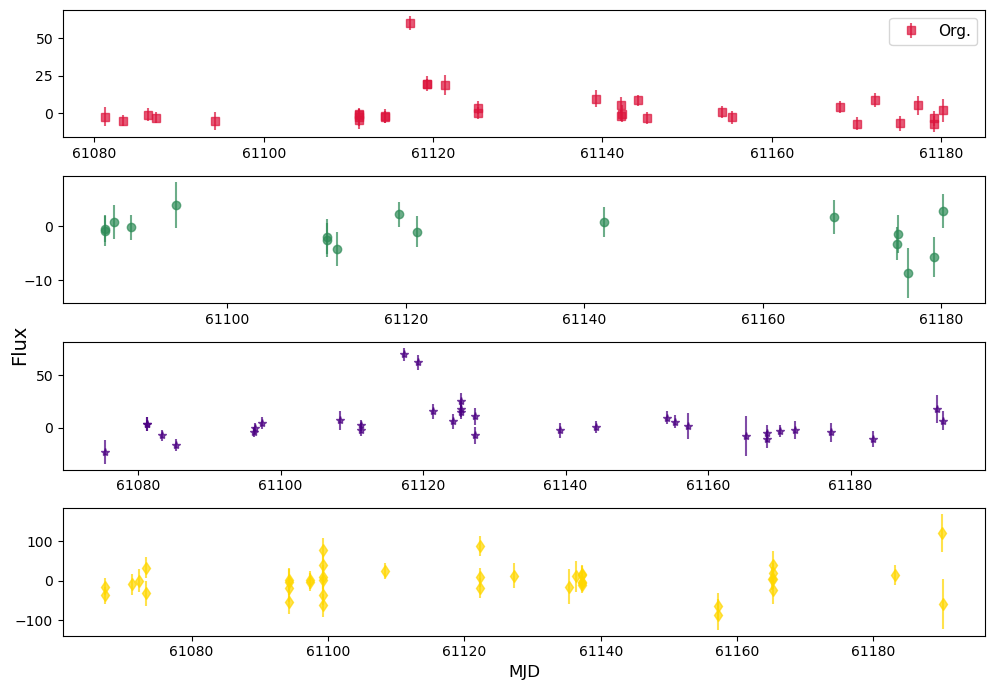

In [12]:
x_dates_dict, y_dict, y_err_dict = return_flux_w_err(elasticc_fits_KN0)
plot_4_bands_w_GP(x_dates_dict, y_dict, y_err_dict)

'b'Y '': 30 times
'b'g '': 4 times
'b'i '': 28 times
'b'r '': 26 times
'b'u '': 11 times
'b'z '': 24 times
3.2110507


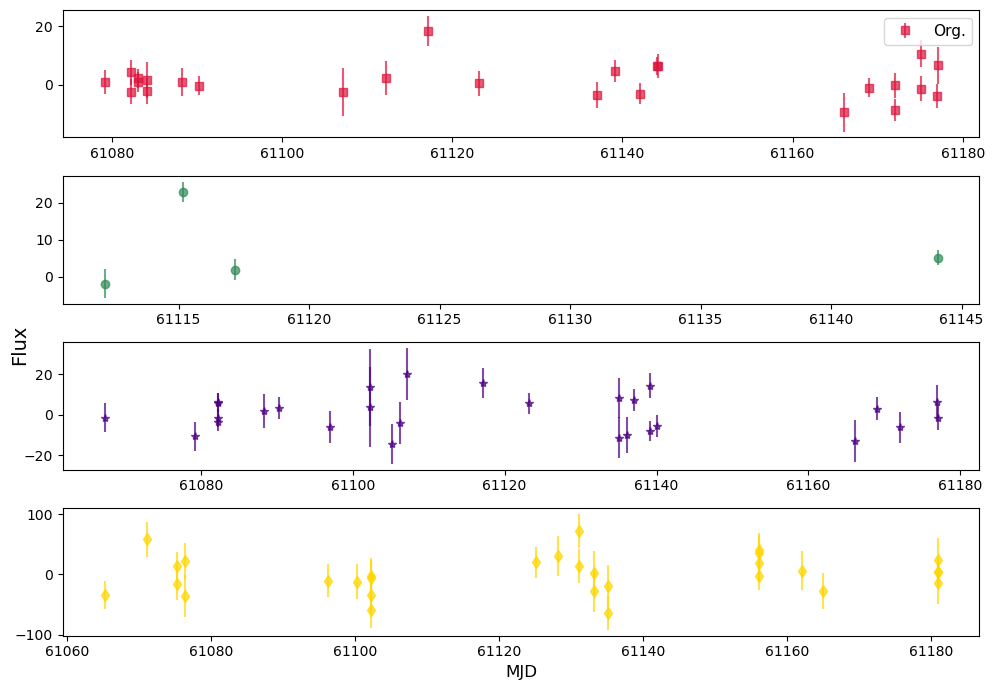

In [13]:
elasticc_fits_KN1, SNSEP_KN1 = read_fits(phot_file='./ELASTICC2_TRAIN_02_NONIaMODEL0-0023_K17_PHOT.FITS', 
                             head_file='./ELASTICC2_TRAIN_02_NONIaMODEL0-0023_K17_HEAD.FITS', low_bound_days=50, 
                             high_bound_days=100, obj_id=3)
print (SNSEP_KN1)

# elasticc_fits_KN0.head(3)
x_dates_dict1, y_dict1, y_err_dict1 = return_flux_w_err(elasticc_fits_KN1)
plot_4_bands_w_GP(x_dates_dict1, y_dict1, y_err_dict1)

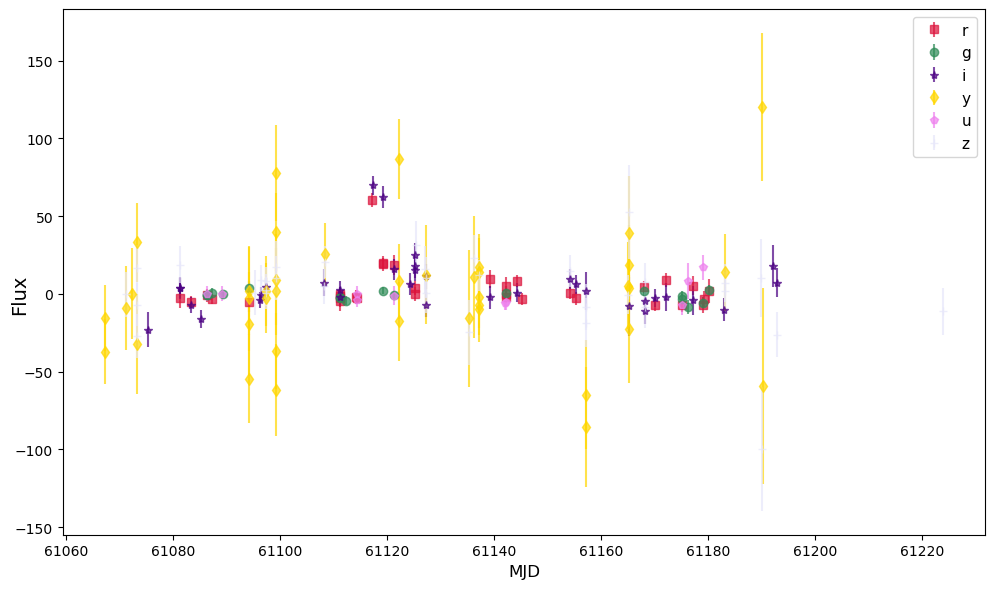

In [11]:
plot_6_bands_w_GP(x_dates_dict, y_dict, y_err_dict)

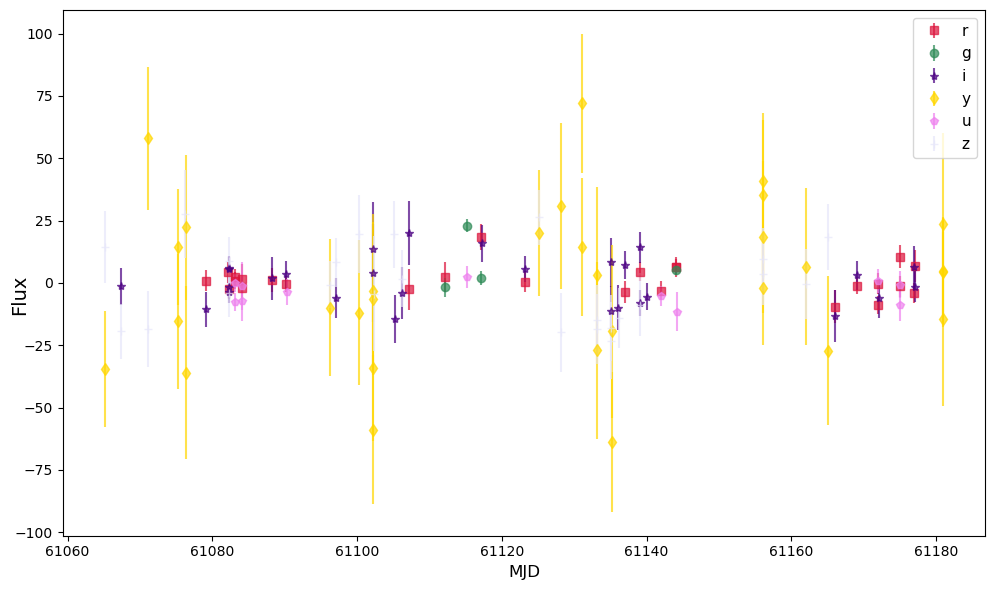

In [16]:
plot_6_bands_w_GP(x_dates_dict1, y_dict1, y_err_dict1)

### Check for TDE

In [14]:
elasticc_fits_TDE, SNSEP_TDE0 = read_fits(phot_file='./ELASTICC2_TRAIN_02_NONIaMODEL0-0004_TDE_PHOT.FITS', 
                              head_file='./ELASTICC2_TRAIN_02_NONIaMODEL0-0004_TDE_HEAD.FITS', 
                              low_bound_days=50, 
                              high_bound_days=100, obj_id=0)
print (SNSEP_TDE0)
elasticc_fits_TDE.head(3)

'b'Y '': 14 times
'b'g '': 5 times
'b'i '': 15 times
'b'r '': 14 times
'b'u '': 3 times
'b'z '': 14 times
0.7604996


,MJD,BAND,FLUXCAL,FLUXCALERR,PSF_SIG1,SKY_SIG,RDNOISE,ZEROPT,GAIN,XPIX,YPIX,SIM_MAGOBS,passband
0,60765.3989,b'i ',7.521503,6.107487,1.65,34.060001,0.25,31.290001,1.0,-9.0,-9.0,99.00000,i
1,60765.4106,b'r ',1.885648,4.280164,1.66,29.350000,0.25,31.520000,1.0,-9.0,-9.0,99.00000,r
2,60780.3479,b'Y ',0.366081,32.070099,1.77,52.520000,0.25,30.030001,1.0,-9.0,-9.0,26.02747,y


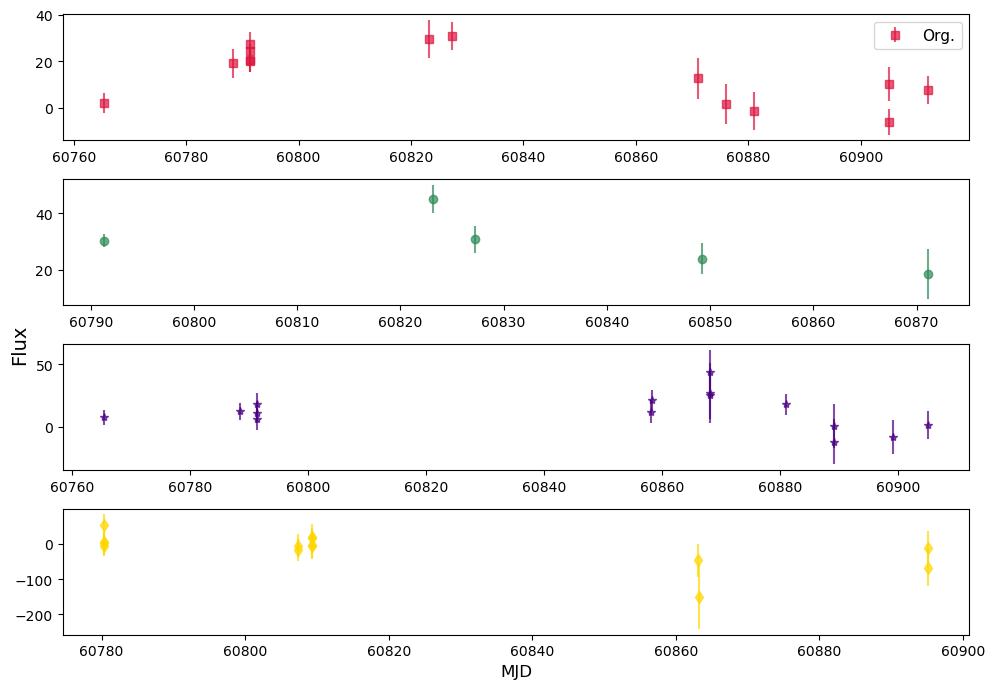

In [13]:

x_dates_dict, y_dict, y_err_dict = return_flux_w_err(elasticc_fits_TDE)
plot_4_bands_w_GP(x_dates_dict, y_dict, y_err_dict)

'b'Y '': 12 times
'b'g '': 5 times
'b'i '': 12 times
'b'r '': 11 times
'b'u '': 4 times
'b'z '': 11 times
0.022163937


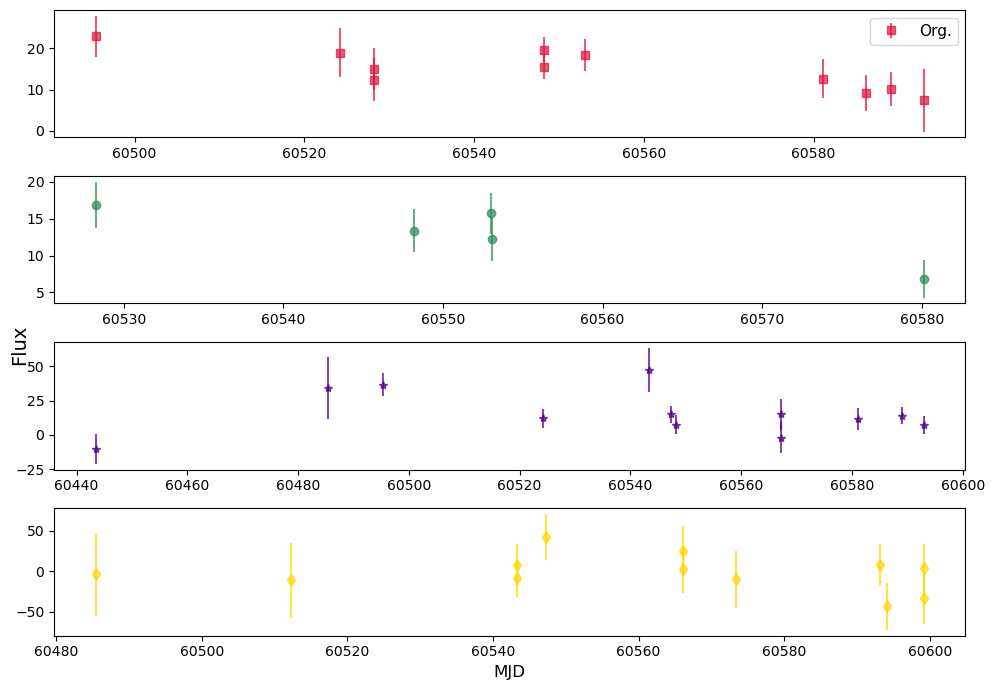

In [15]:
elasticc_fits_TDE1, SNSEP_TDE1 = read_fits(phot_file='./ELASTICC2_TRAIN_02_NONIaMODEL0-0004_TDE_PHOT.FITS', 
                              head_file='./ELASTICC2_TRAIN_02_NONIaMODEL0-0004_TDE_HEAD.FITS', 
                              low_bound_days=50, 
                              high_bound_days=100, obj_id=3)

print (SNSEP_TDE1)
x_dates_dict1, y_dict1, y_err_dict1 = return_flux_w_err(elasticc_fits_TDE1)
plot_4_bands_w_GP(x_dates_dict1, y_dict1, y_err_dict1)

In [16]:
elasticc_fits_TDE2, SNSEP_TDE2 = read_fits(phot_file='./ELASTICC2_TRAIN_02_NONIaMODEL0-0004_TDE_PHOT.FITS', 
                              head_file='./ELASTICC2_TRAIN_02_NONIaMODEL0-0004_TDE_HEAD.FITS', 
                              low_bound_days=50, 
                              high_bound_days=100, obj_id=5)
print (SNSEP_TDE2)

'b'Y '': 12 times
'b'g '': 6 times
'b'i '': 11 times
'b'r '': 9 times
'b'u '': 5 times
'b'z '': 13 times
0.13029246


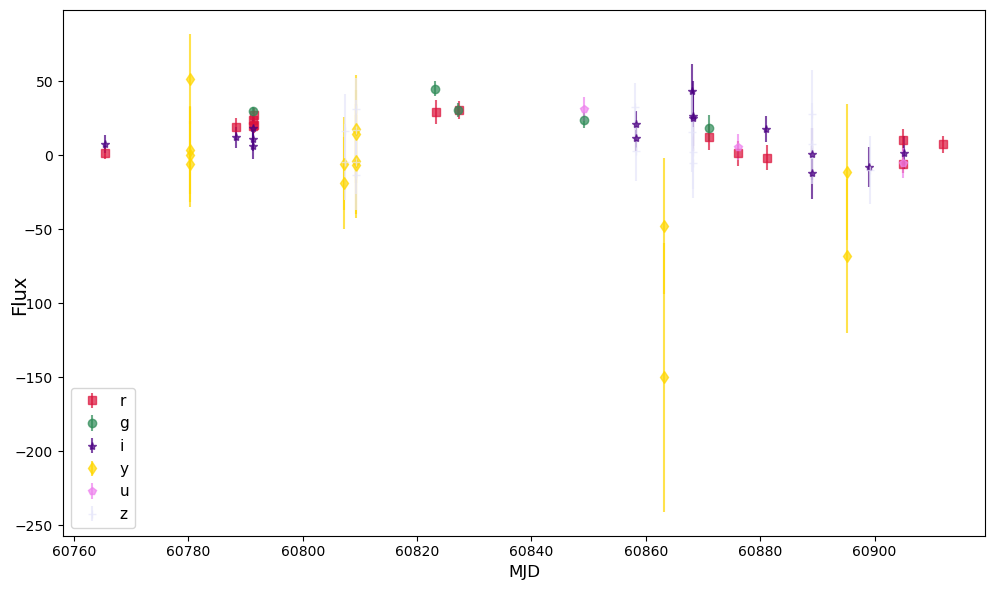

In [24]:
plot_6_bands_w_GP(x_dates_dict, y_dict, y_err_dict)

### Check for PISN

'b'Y '': 21 times
'b'g '': 10 times
'b'i '': 27 times
'b'r '': 27 times
'b'u '': 10 times
'b'z '': 29 times
0.08854913


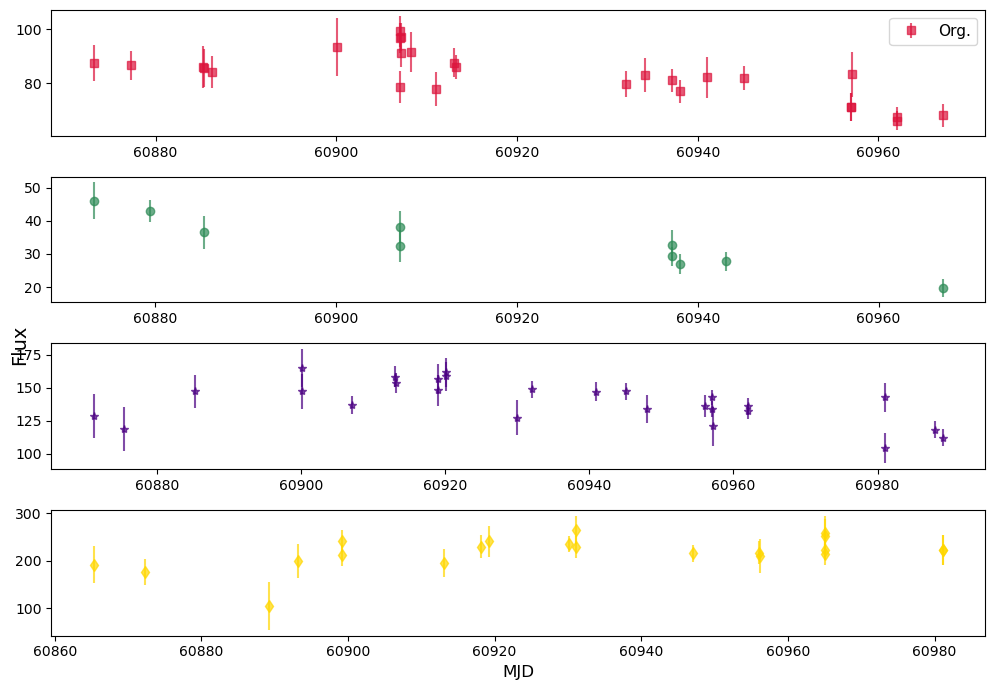

In [17]:
elasticc_fits_PISN, SNSEP_PISN0 = read_fits(phot_file='./ELASTICC2_TRAIN_02_NONIaMODEL0-0008_PISN_PHOT.FITS', 
                               head_file='./ELASTICC2_TRAIN_02_NONIaMODEL0-0008_PISN_HEAD.FITS', 
                               low_bound_days=50, 
                               high_bound_days=100, obj_id=1)


print (SNSEP_PISN0)
x_dates_dictPISN1, y_dictPISN1, y_err_dictPISN1 = return_flux_w_err(elasticc_fits_PISN)
plot_4_bands_w_GP(x_dates_dictPISN1, y_dictPISN1, y_err_dictPISN1)